<a href="https://colab.research.google.com/github/mikemaid/Notebook/blob/main/HousePrices/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [5]:
# data preprocessing
df = pd.read_csv('https://drive.google.com/uc?id=1lmdFHwqfATwOrT1EzuL5Re0kP8tzqH8x')
dataset = df.values
x = dataset[:,0:10]
y = dataset[:,10]
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

x_train, x_val_test, y_train, y_val_test = train_test_split(x_scale, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [6]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 14s 15ms/step - loss: 0.6831 - accuracy: 0.5365 - val_loss: 0.6734 - val_accuracy: 0.6301
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.6283 - val_loss: 0.6692 - val_accuracy: 0.7260
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.7177 - val_loss: 0.6648 - val_accuracy: 0.7717
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.7458 - val_loss: 0.6602 - val_accuracy: 0.7717
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.7499 - val_loss: 0.6557 - val_accuracy: 0.7717
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.7551 - val_loss: 0.6514 - val_accuracy: 0.7763
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.7676 - val_loss: 0.6470 - val_accuracy: 0.7717
Epoch 8/100

In [7]:
model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.8767


0.8767123222351074

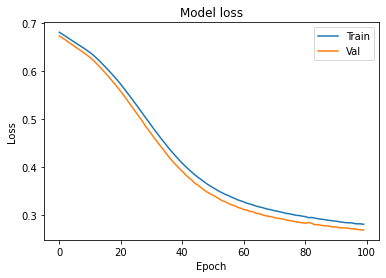

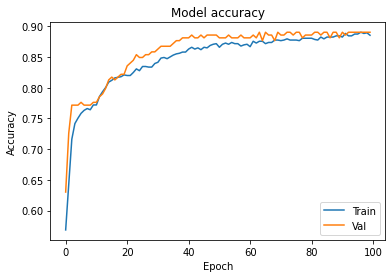

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [9]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 2s 30ms/step - loss: 0.5559 - accuracy: 0.6843 - val_loss: 0.3251 - val_accuracy: 0.8904
Epoch 2/100
32/32 [==============================] - 1s 22ms/step - loss: 0.3551 - accuracy: 0.8599 - val_loss: 0.3019 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 1s 22ms/step - loss: 0.3230 - accuracy: 0.8753 - val_loss: 0.3218 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.3335 - accuracy: 0.8544 - val_loss: 0.2660 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2564 - accuracy: 0.8965 - val_loss: 0.2497 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2867 - accuracy: 0.8748 - val_loss: 0.2873 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2871 - accuracy: 0.8751 - val_loss: 0.2592 - val_accuracy: 0.8950
Epoch 

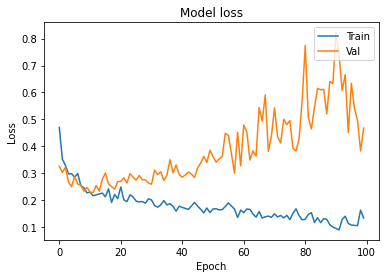

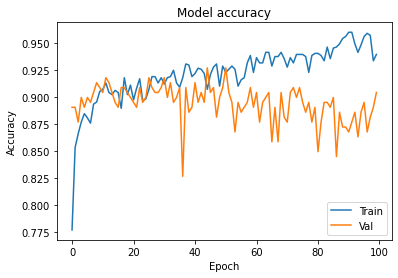

In [10]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [11]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 3s 38ms/step - loss: 21.1117 - accuracy: 0.6573 - val_loss: 3.8935 - val_accuracy: 0.7580
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 2.5060 - accuracy: 0.8021 - val_loss: 0.6803 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 0.6241 - accuracy: 0.8470 - val_loss: 0.4935 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5335 - accuracy: 0.8355 - val_loss: 0.4692 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5031 - accuracy: 0.8738 - val_loss: 0.6001 - val_accuracy: 0.8082
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5634 - accuracy: 0.8468 - val_loss: 0.4620 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4724 - accuracy: 0.8758 - val_loss: 0.4520 - val_accuracy: 0.8950
Epoch

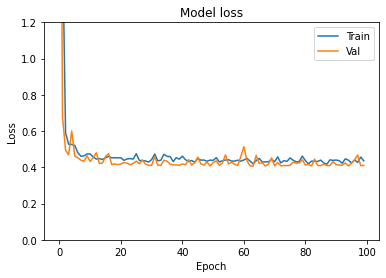

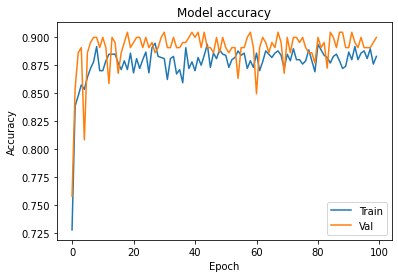

In [12]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()